In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from Bio.Phylo._io import parse
from Bio.Phylo.BaseTree import Tree as BioTree

from src.utils.tree_utils import get_taxa_names
from src.utils.tree_utils import get_tree_height
from src.distribution_analysis.process_tree import get_observed_nodes, get_clade_split_df

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [4]:
REFERENCE_TREE_FILE = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/mcmc_runs/yule-10-0.trees")
SAMPLE_TREES_FILE = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/sampled_bccd/yule-10-0.trees")
NUM_TAXA = 10

In [5]:
ref_trees: list[BioTree] = list(parse(REFERENCE_TREE_FILE, "nexus"))
sample_trees: list[BioTree] = list(parse(SAMPLE_TREES_FILE, "nexus"))

In [8]:
taxa_names = get_taxa_names(ref_trees[0])

In [11]:
ref_tree_heights = [
    get_tree_height(tree)
    for tree in ref_trees
]
sample_tree_heights = [
    get_tree_height(tree)
    for tree in sample_trees
]

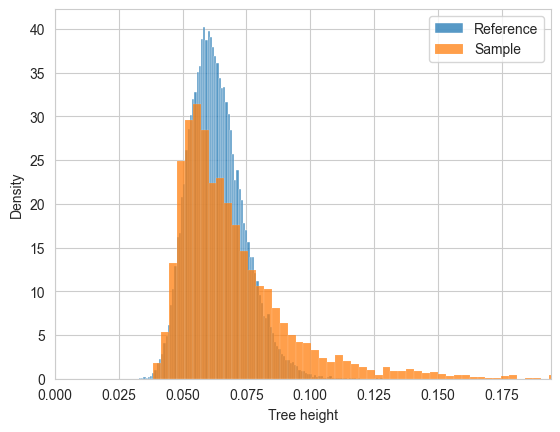

In [38]:
import numpy as np

max_displayed_height = np.percentile(sample_tree_heights + sample_tree_heights, 99)

sns.histplot(
    ref_tree_heights,
    stat="density",
    label="Reference",
)
sns.histplot(
    sample_tree_heights,
    stat="density",
    label="Sample",
)

plt.xlabel("Tree height")
plt.xlim(0, max_displayed_height)
plt.legend()

plt.savefig("test.png", dpi=200)
plt.show()

In [18]:
ref_nodes, ref_clade_splits = get_observed_nodes(ref_trees, taxa_names)
sample_nodes, sample_clade_splits = get_observed_nodes(sample_trees, taxa_names)

35001it [00:01, 26674.66it/s]
3499it [00:00, 38483.99it/s]


In [19]:
df_ref_clade_branches = get_clade_split_df(ref_clade_splits)
df_sample_clade_branches = get_clade_split_df(sample_clade_splits)

100%|██████████| 31491/31491 [00:00<00:00, 1384937.01it/s]


In [20]:
df_ref_clade_branches.describe()

,tree_index,left_branch,right_branch,min_branch,max_branch,distance_to_root,distance_to_leaf,height
count,315009.000000,3.150090e+05,3.150090e+05,3.150090e+05,3.150090e+05,315009.000000,315009.000000,315009.000000
mean,17500.000000,1.387369e-02,2.246806e-02,1.068820e-02,2.565355e-02,2.586590,2.642537,0.033996
std,10103.934419,1.416116e-02,2.216634e-02,1.222035e-02,2.162172e-02,1.483713,1.646282,0.023958
min,0.000000,2.923678e-08,2.923678e-08,2.923678e-08,2.923678e-08,0.000000,1.000000,0.000000
25%,8750.000000,2.757644e-03,3.596235e-03,2.242390e-03,5.665635e-03,2.000000,1.000000,0.012681
50%,17500.000000,7.689994e-03,1.154185e-02,5.735506e-03,2.022596e-02,3.000000,2.000000,0.033055
75%,26250.000000,2.418582e-02,4.096733e-02,1.333832e-02,4.254489e-02,4.000000,4.000000,0.054359
max,35000.000000,8.867450e-02,1.282626e-01,8.867450e-02,1.282626e-01,6.000000,7.000000,0.127955


In [21]:
df_sample_clade_branches.describe()

,tree_index,left_branch,right_branch,min_branch,max_branch,distance_to_root,distance_to_leaf,height
count,31491.000000,31491.000000,31491.000000,31491.000000,31491.000000,31491.000000,31491.000000,31491.000000
mean,1749.000000,0.015163,0.024488,0.011436,0.028216,2.583881,2.635515,0.039868
std,1010.090293,0.019514,0.029287,0.016242,0.029622,1.479394,1.638886,0.039482
min,0.000000,0.000004,0.000004,0.000004,0.000004,0.000000,1.000000,0.000000
25%,874.000000,0.002701,0.003737,0.002101,0.006820,2.000000,1.000000,0.012305
50%,1749.000000,0.007878,0.011270,0.006084,0.025394,3.000000,2.000000,0.037802
75%,2624.000000,0.028425,0.040620,0.014680,0.042721,4.000000,4.000000,0.057651
max,3498.000000,1.239440,1.279203,1.239440,1.279203,6.000000,7.000000,1.279036


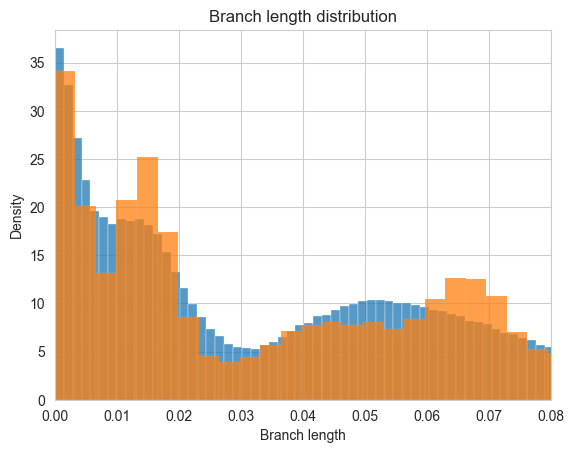

In [42]:
sns.histplot(
    df_ref_clade_branches["left_branch"] + df_ref_clade_branches["right_branch"], 
    stat="density",
)

sns.histplot(
    df_sample_clade_branches["left_branch"] + df_sample_clade_branches["right_branch"], 
    stat="density",
)

plt.xlim([0, 0.08])
plt.xlabel("Branch length")
plt.title("Branch length distribution")
plt.show()